# Statistical Change Poin Detecton (AHCCD)

### Pettitt Test

#### Importing Libraries

In [56]:
import sys
!{sys.executable} -m pip install pyhomogeneity ruptures seaborn


#### Code


Pettitt Test for 'Min Temperature':
Change Detected: True
Change Point at index: 47, Year: 1997
Test Statistic (U): 784.0
p-value: 0.00025189767881784347
Result: Significant change point detected.
Mean before change point: 5.8312
Mean after change point: 6.6125


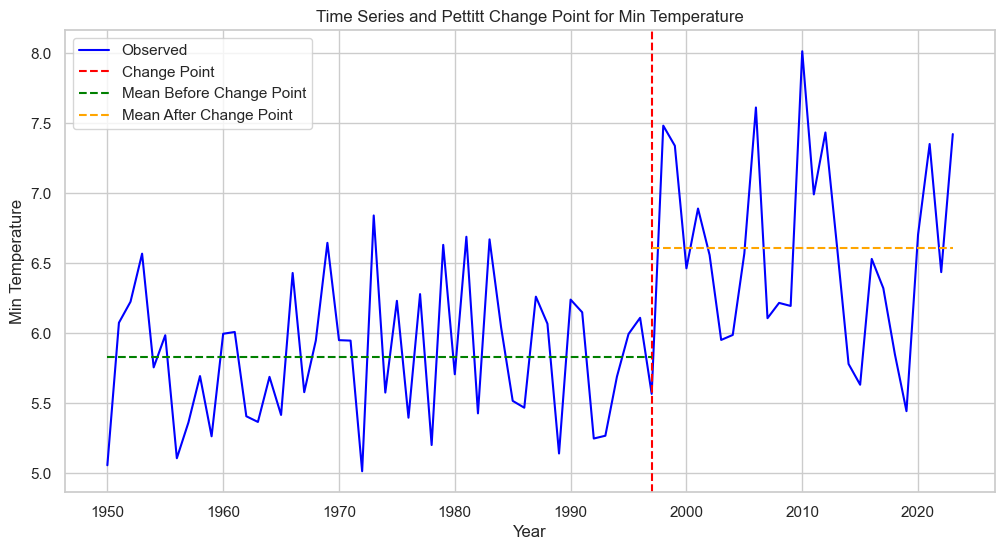


Pettitt Test for 'Max Temperature':
Change Detected: True
Change Point at index: 47, Year: 1997
Test Statistic (U): 764.0
p-value: 0.0003959642455715386
Result: Significant change point detected.
Mean before change point: 14.3792
Mean after change point: 15.0407


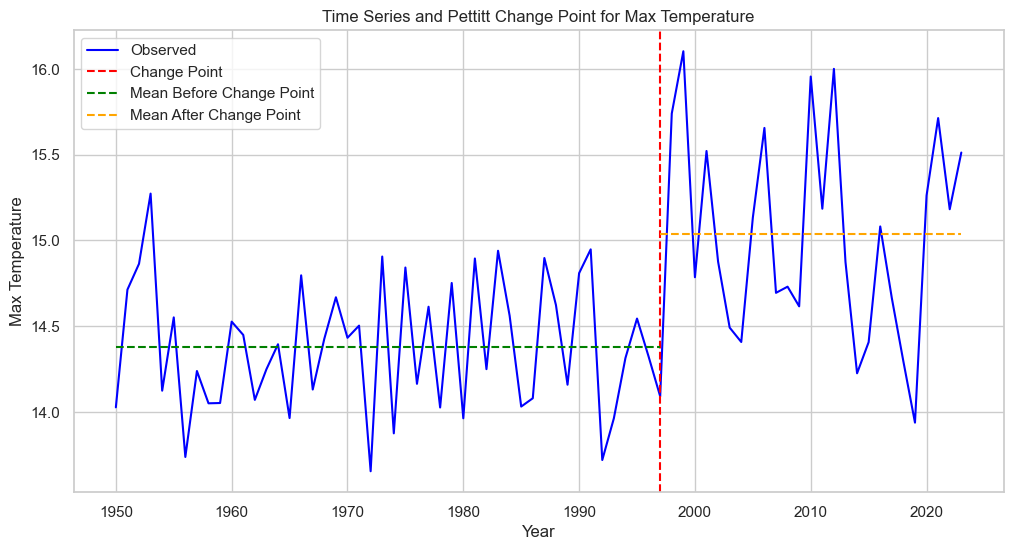


Pettitt Test for 'Snow':
Change Detected: False
Change Point at index: 47, Year: 1997
Test Statistic (U): 302.0
p-value: 0.35987898146327013
Result: No significant change point detected.


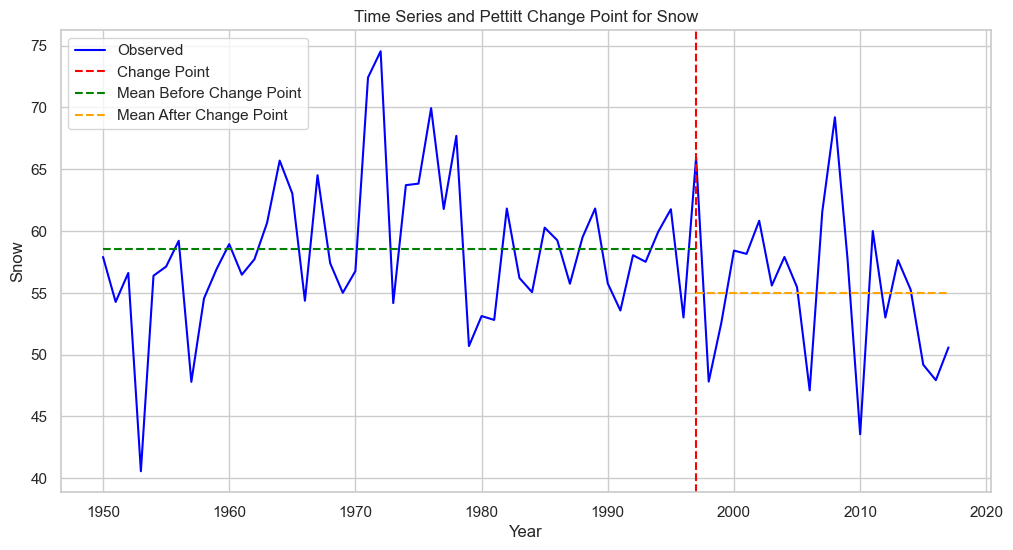


Pettitt Test for 'Rain':
Change Detected: True
Change Point at index: 28, Year: 1978
Test Statistic (U): 603.0
p-value: 0.0021448338290906174
Result: Significant change point detected.
Mean before change point: 124.3170
Mean after change point: 134.8084


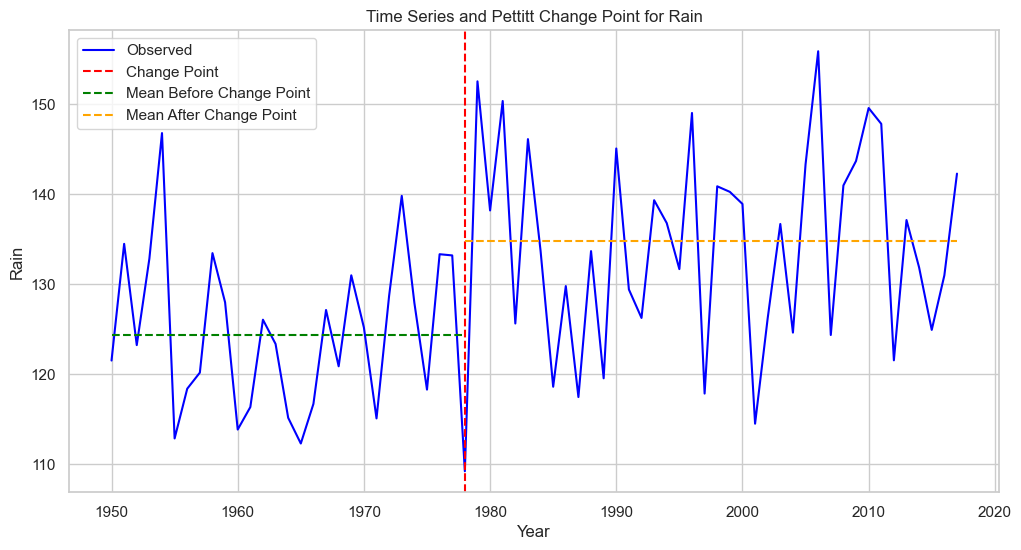


Pettitt Test for 'Total Precipitation':
Change Detected: True
Change Point at index: 20, Year: 1970
Test Statistic (U): 589.0
p-value: 0.002935529560547189
Result: Significant change point detected.
Mean before change point: 174.9320
Mean after change point: 185.5188


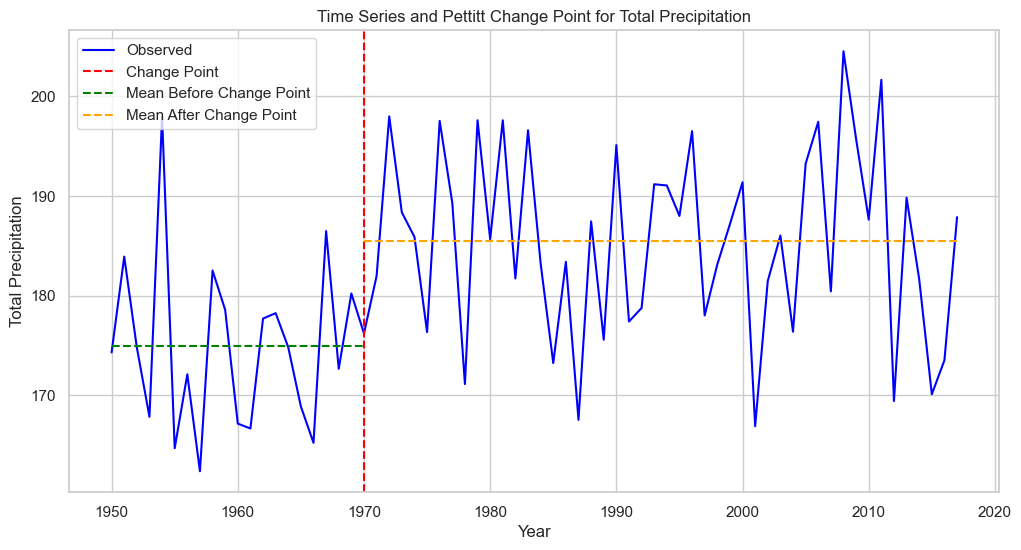


Pettitt Test for 'Sea Level Pressure':
Change Detected: True
Change Point at index: 26, Year: 1981
Test Statistic (U): 403.0
p-value: 0.023653192327343954
Result: Significant change point detected.
Mean before change point: 866.9214
Mean after change point: 867.3976


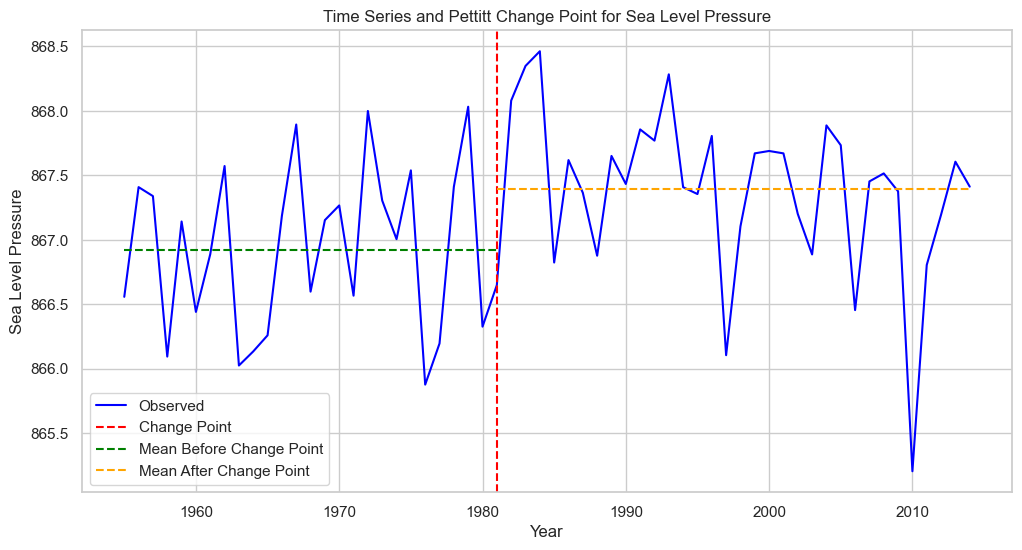


Pettitt Test for 'Station Pressure':
Change Detected: False
Change Point at index: 7, Year: 1962
Test Statistic (U): 362.0
p-value: 0.05572702964177777
Result: No significant change point detected.


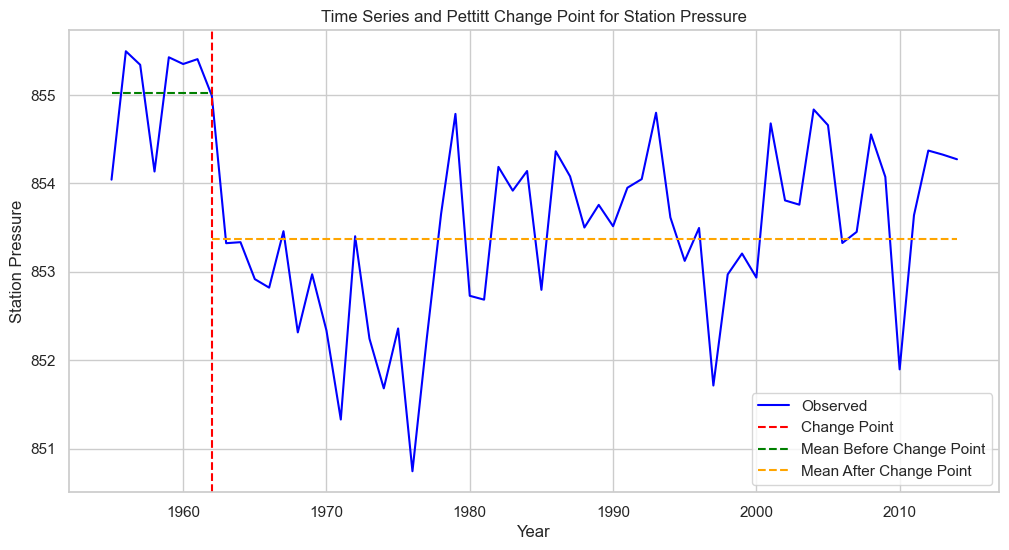


Pettitt Test for 'Mean Wind Speed':
Change Detected: True
Change Point at index: 29, Year: 1982
Test Statistic (U): 936.0
p-value: 7.486018329815824e-10
Result: Significant change point detected.
Mean before change point: 19.5441
Mean after change point: 18.6239


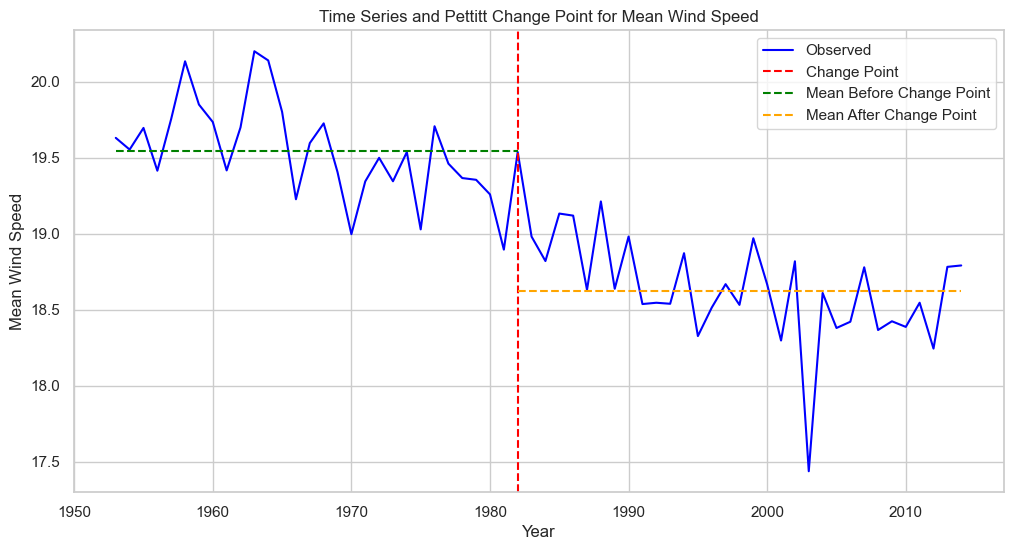


Pettitt Test for 'Mean Temperature':
Change Detected: True
Change Point at index: 47, Year: 1997
Test Statistic (U): 790.0
p-value: 0.0002194344704708484
Result: Significant change point detected.
Mean before change point: 10.1116
Mean after change point: 10.8331


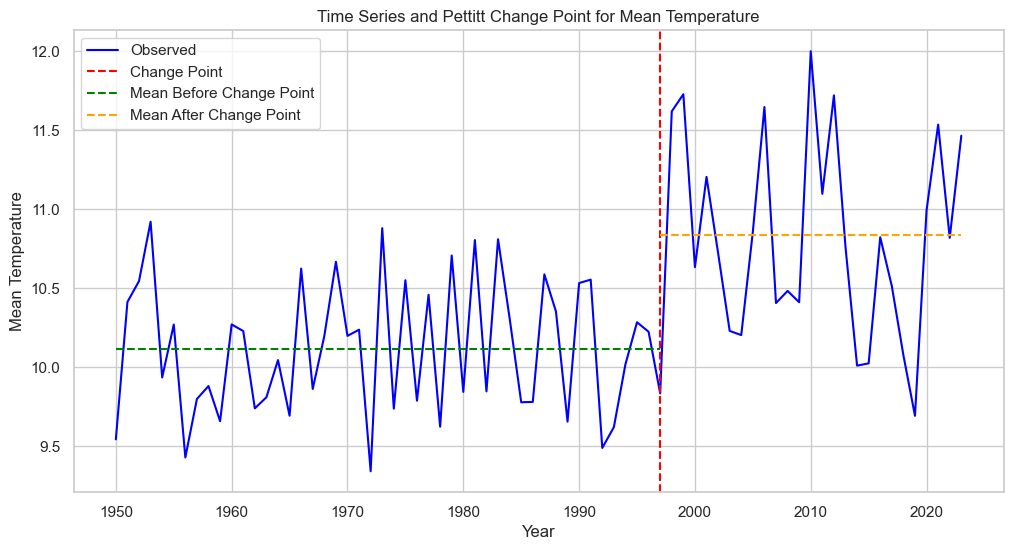

In [110]:

def pettitt_test(data):
    n = len(data)
    ranks = np.argsort(np.argsort(data)) + 1  #compute ranks
    U = np.zeros(n)
    for t in range(n):
        U[t] = 2 * np.sum(ranks[:t+1]) - (t+1) * (n + 1)
    U_abs = np.abs(U)
    K = U_abs
    Umax = np.max(K)
    change_point_index = np.argmax(K)
    p_value = 2 * np.exp((-6 * Umax**2) / (n**3 + n**2))
    change_detected = p_value < 0.05
    mean_before = np.mean(data[:change_point_index+1])
    mean_after = np.mean(data[change_point_index+1:])
    return change_detected, p_value, Umax, change_point_index, mean_before, mean_after

ecws_data = pd.read_csv('AHCCD_CONFINED.csv')
ecws_data['Year'] = pd.to_numeric(ecws_data['Year'], errors='coerce')
ecws_data = ecws_data.dropna(subset=['Year'])

start_year = 1950
end_year = 2023

variable_types = ecws_data['Value Type'].unique()

for var_type in variable_types:
    data_subset = ecws_data[ecws_data['Value Type'] == var_type]#filter for variable type
    data_subset = data_subset[(data_subset['Year'] >= start_year) & (data_subset['Year'] <= end_year)]#filter for time span
    yearly_avg = data_subset.groupby('Year').mean(numeric_only=True).reset_index()#gorpu by yeaar and clculate mean across all stations

    if len(yearly_avg) < 10:#check if enough data
        print(f"Not enough data for {var_type}.")
        continue

    years = yearly_avg['Year'].values#year
    y = yearly_avg.iloc[:, 1:].mean(axis=1).values#mean

    valid_indices = ~np.isnan(y)#removing nans
    y_clean = y[valid_indices]
    years_clean = years[valid_indices]

    if len(y_clean) < 10:#check if enough valid data
        print(f"Not enough valid data for {var_type}")
        continue


    print(f"\nPettitt Test for '{var_type}':")#performing pettitt test
    try:
        result = pettitt_test(y_clean)
        change_detected, p_value, Umax, change_point_index, mean_before, mean_after = result

        print(f"Change Detected: {change_detected}")
        print(f"Change Point at index: {change_point_index}, Year: {years_clean[change_point_index]}")
        print(f"Test Statistic (U): {Umax}")
        print(f"p-value: {p_value}")

        if change_detected:
            print("Result: Significant change point detected.")
            print(f"Mean before change point: {mean_before:.4f}")
            print(f"Mean after change point: {mean_after:.4f}")
        else:
            print("Result: No significant change point detected.")
    except Exception as e:
        print(f"An error occurred while performing the Pettitt test for '{var_type}': {e}")
        continue
#plotting
    plt.figure(figsize=(12, 6))
    plt.plot(years_clean, y_clean, label='Observed', color='blue')
    plt.axvline(x=years_clean[change_point_index], color='red', linestyle='--', label='Change Point')
    plt.hlines(mean_before, xmin=years_clean[0], xmax=years_clean[change_point_index], colors='green', linestyles='--', label='Mean Before Change Point')
    plt.hlines(mean_after, xmin=years_clean[change_point_index], xmax=years_clean[-1], colors='orange', linestyles='--', label='Mean After Change Point')

    plt.title(f'Time Series and Pettitt Change Point for {var_type}')
    plt.xlabel('Year')
    plt.ylabel(var_type)
    plt.legend()
    plt.grid(True)
    plt.show()


#### HadUK

<>:63: SyntaxWarning: invalid escape sequence '\('
<>:63: SyntaxWarning: invalid escape sequence '\('
/var/folders/h5/wr1_5h5s2sd3jw2htzn509v00000gp/T/ipykernel_78897/1090013038.py:63: SyntaxWarning: invalid escape sequence '\('
  print(f"Test Statistic (\(U\)): {Umax}")



Pettitt Test on Annual Average Temperature (1950–2024, UK):
Change Detected: True
Change Point at index: 37, Year: 1987
Test Statistic (\(U\)): 1132.0
p-value: 1.4817792421425765e-08
Result: Significant change point detected.
Mean before change point: 8.2421
Mean after change point: 9.1537


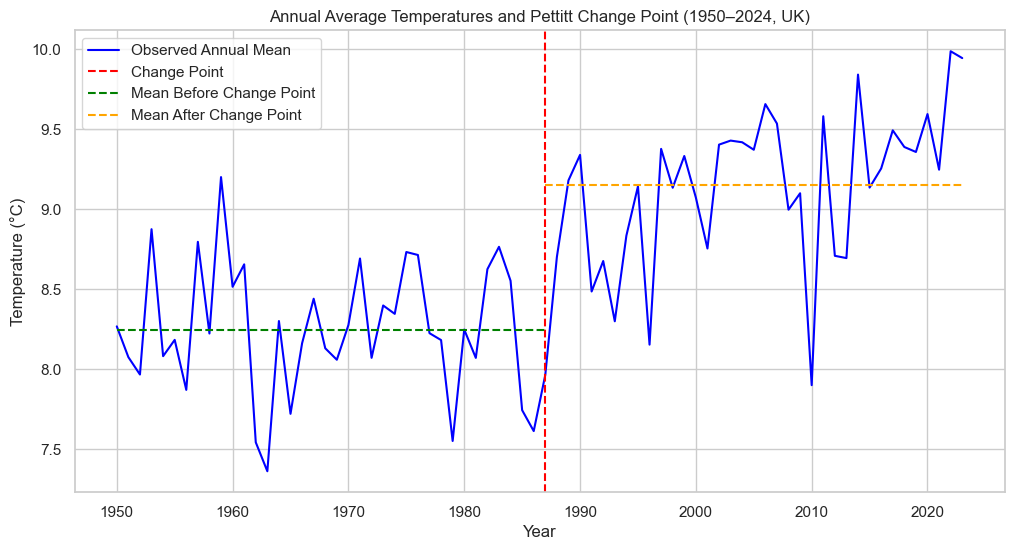

In [115]:

data_temp = xr.open_mfdataset(r"/Users/maxMax/Desktop/Datasets/12km/tas/mon/v20240514/*.nc", parallel=False)

data_all_months = data_temp.tas.values
time_index = pd.to_datetime(data_temp.time.values)
annual_mean_temp = block_reduce(data_all_months, block_size=(12, 1, 1), func=np.mean, cval=np.nan)
annual_mean_uk = np.nanmean(annual_mean_temp, axis=(1, 2))  # Average over spatial dimensions

start_year = 1950
end_year = 2024

years = np.arange(1884, 1884 + len(annual_mean_uk))

range_indices = (years >= start_year) & (years <= end_year)#filtering for chosen time span
years_filtered = years[range_indices]
annual_mean_uk_filtered = annual_mean_uk[range_indices]

valid_indices = ~np.isnan(annual_mean_uk_filtered)#removing nans
annual_mean_uk_clean = annual_mean_uk_filtered[valid_indices]
years_clean = years_filtered[valid_indices]

print("\nPettitt Test on Annual Average Temperature (1950–2024, UK):")
try:
    result = pettitt_test(annual_mean_uk_clean)
    change_detected, p_value, Umax, change_point_index, mean_before, mean_after = result

    print(f"Change Detected: {change_detected}")
    print(f"Change Point at index: {change_point_index}, Year: {years_clean[change_point_index]}")
    print(f"Test Statistic (\(U\)): {Umax}")
    print(f"p-value: {p_value}")

    if change_detected:
        print("Result: Significant change point detected.")
        print(f"Mean before change point: {mean_before:.4f}")
        print(f"Mean after change point: {mean_after:.4f}")
    else:
        print("Result: No significant change point detected.")
except Exception as e:
    print(f"An error occurred while performing the Pettitt test: {e}")

#plotting
plt.figure(figsize=(12, 6))
plt.plot(years_clean, annual_mean_uk_clean, label='Observed Annual Mean', color='blue')
plt.axvline(x=years_clean[change_point_index], color='red', linestyle='--', label='Change Point')
plt.hlines(mean_before, xmin=years_clean[0], xmax=years_clean[change_point_index], colors='green', linestyles='--', label='Mean Before Change Point')
plt.hlines(mean_after, xmin=years_clean[change_point_index], xmax=years_clean[-1], colors='orange', linestyles='--', label='Mean After Change Point')

plt.title('Annual Average Temperatures and Pettitt Change Point (1950–2024, UK)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()




### Bayesian Change Point Detection


Changepoint Detection for 'Min Temperature':
Detected Changepoints at Years: [1920, 1950, 1995]


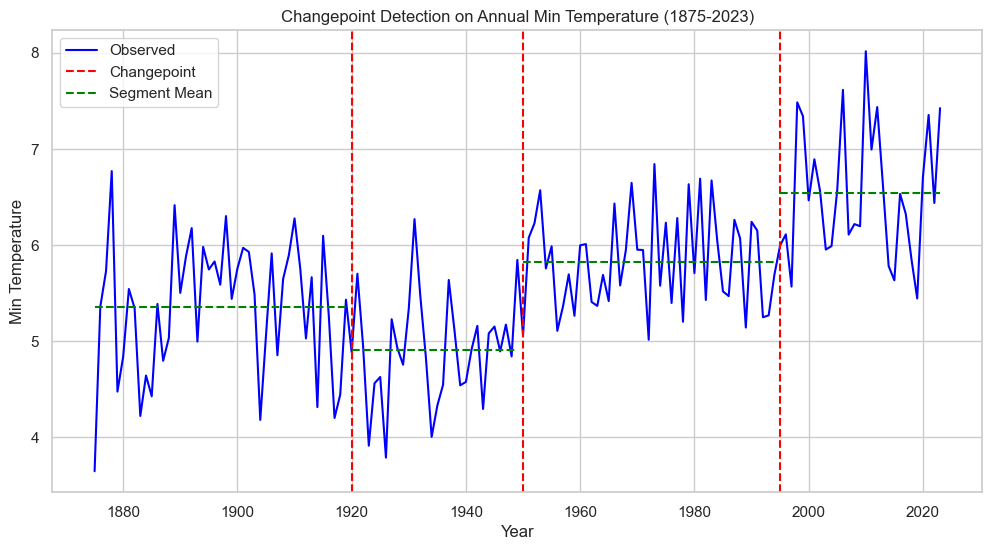


Changepoint Detection for 'Max Temperature':
Detected Changepoints at Years: [1945, 1995]


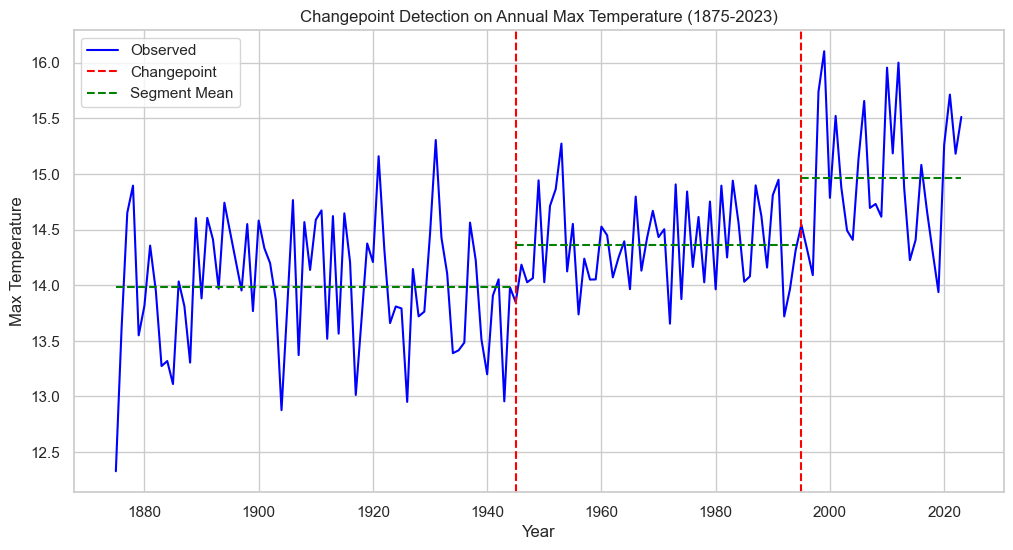


Changepoint Detection for 'Snow':
Detected Changepoints at Years: [1890, 1950, 2015]


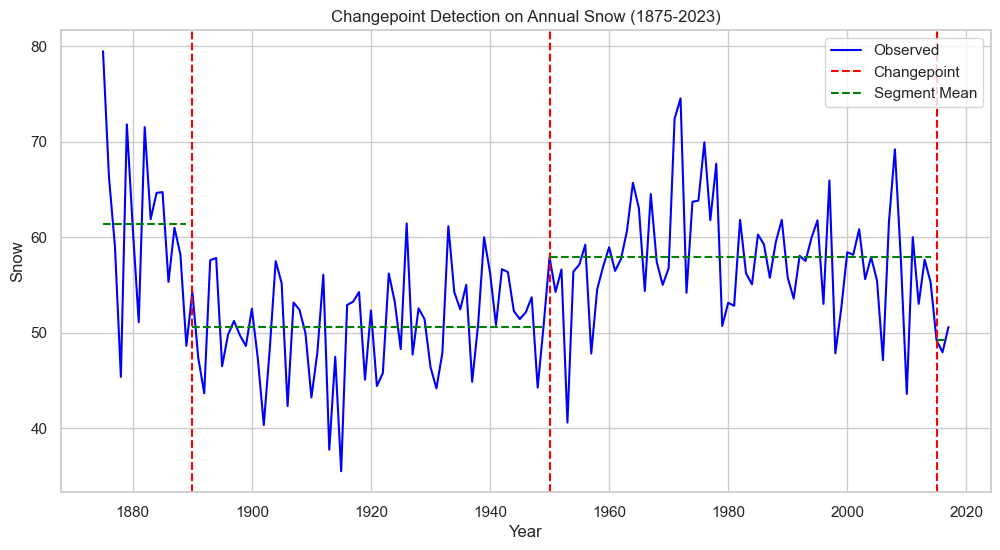


Changepoint Detection for 'Rain':
Detected Changepoints at Years: [1915, 1990]


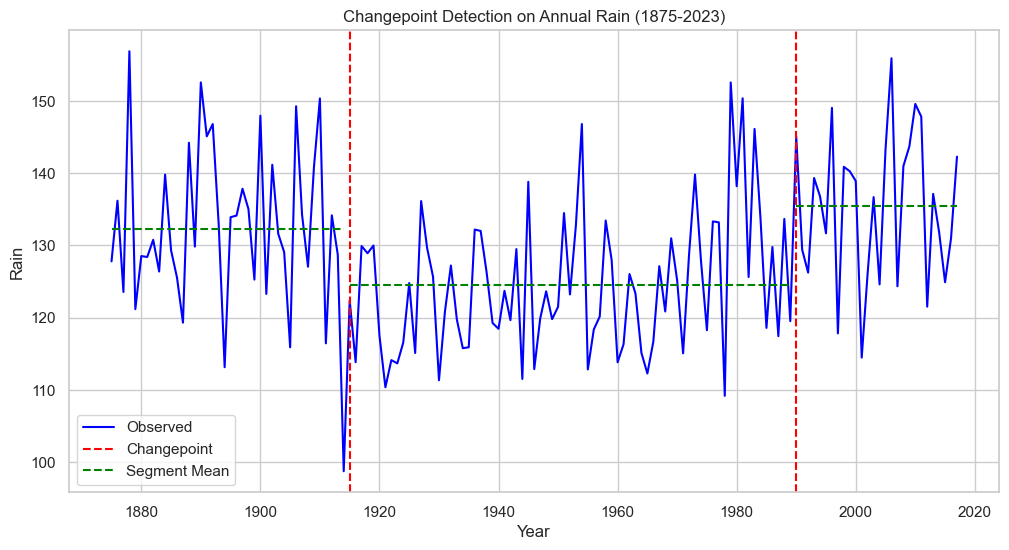


Changepoint Detection for 'Total Precipitation':
Detected Changepoints at Years: [1915, 1970]


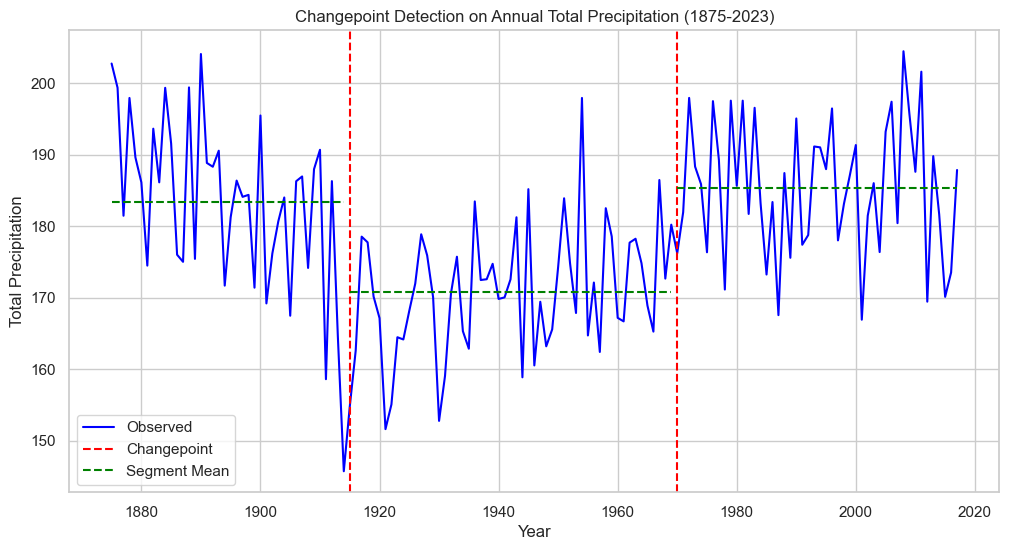


Changepoint Detection for 'Sea Level Pressure':
Detected Changepoints at Years: [1985]


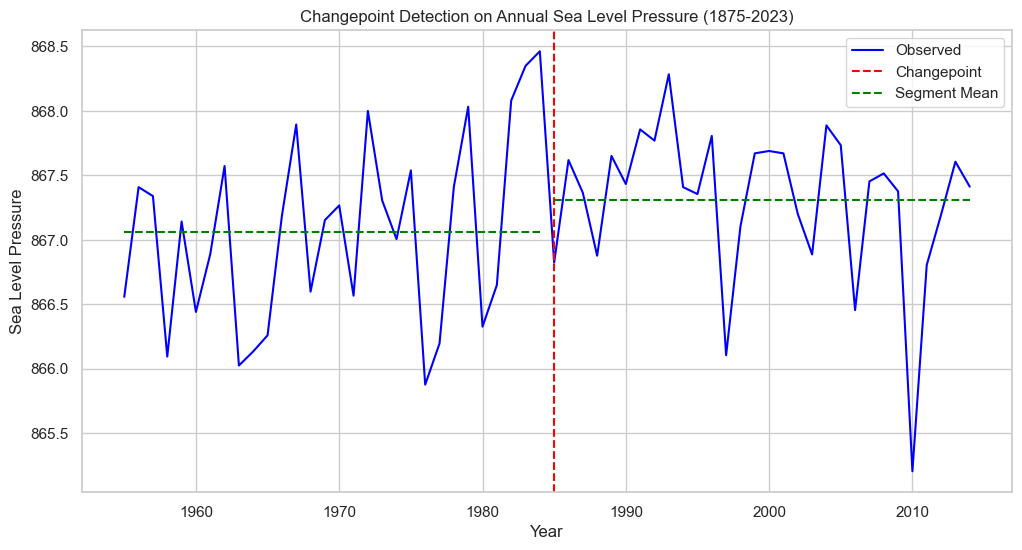


Changepoint Detection for 'Station Pressure':
Detected Changepoints at Years: [1965, 1980]


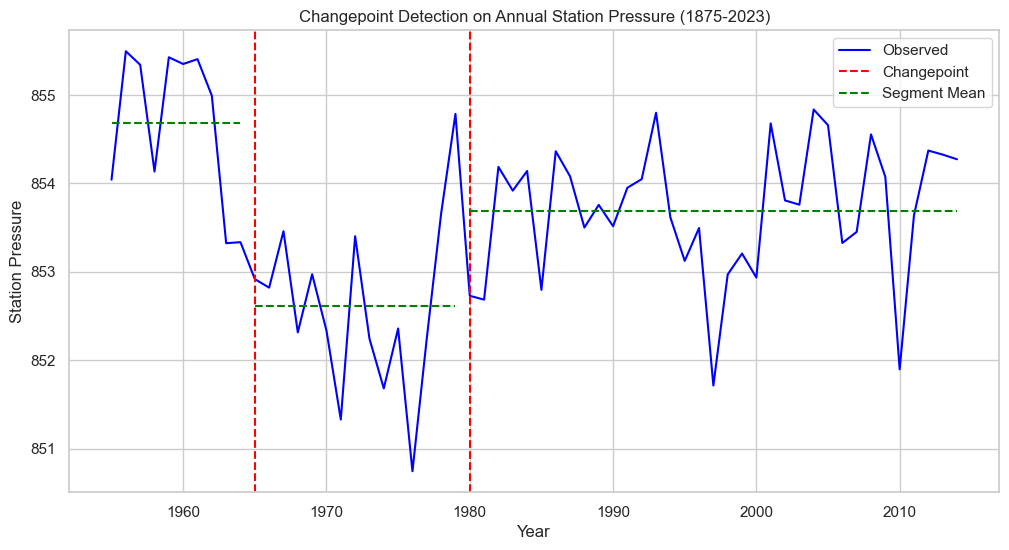


Changepoint Detection for 'Mean Wind Speed':
Detected Changepoints at Years: [1968, 1983]


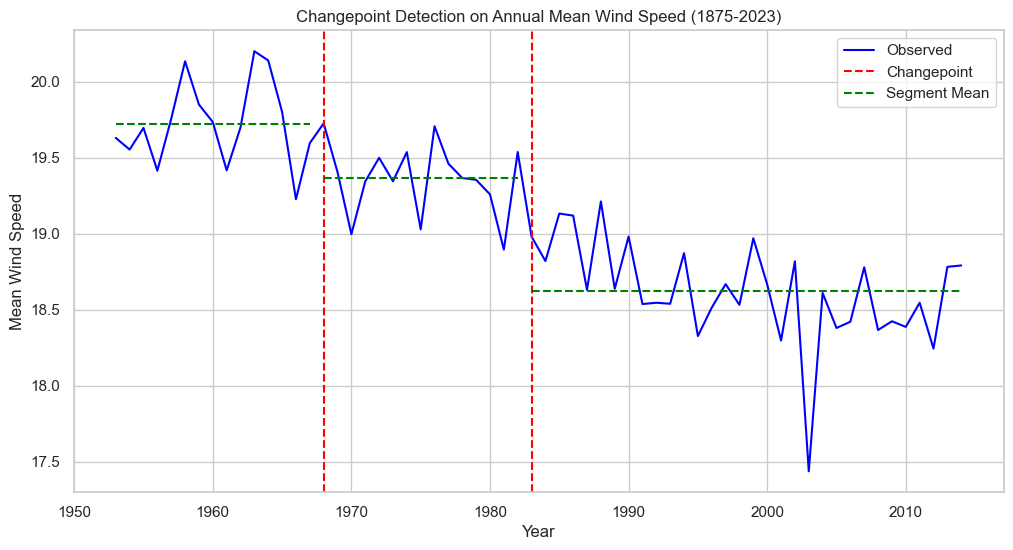


Changepoint Detection for 'Mean Temperature':
Detected Changepoints at Years: [1950, 1995]


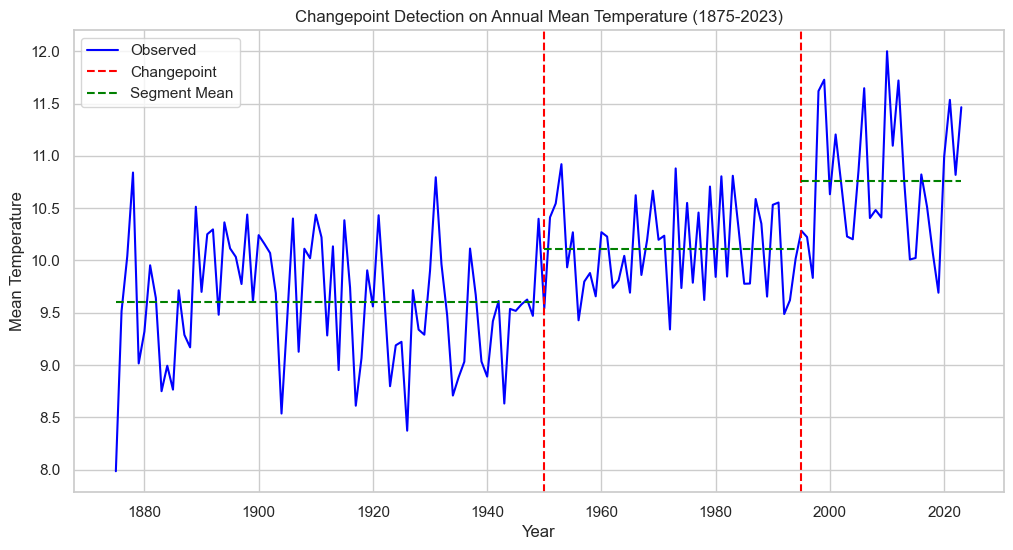

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

ecws_data = pd.read_csv('AHCCD_CONFINED.csv')
ecws_data['Year'] = pd.to_numeric(ecws_data['Year'], errors='coerce')#making sure year is a number
ecws_data = ecws_data.dropna(subset=['Year'])#dropping rows where years is nan

start_year = 1875
end_year = 2023

variable_types = ecws_data['Value Type'].unique()#lists variables


def detect_changepoints(time_series, model="rbf", pen=2, algo_type="Binseg"):#defining changepoint detetction function, model used by algorthm is radial basis function and algorithm is binary segmentation
    algo = rpt.Binseg(model=model).fit(time_series)#higher penalty results in fewer changepoints
    result = algo.predict(pen=pen)
    return result

for var_type in variable_types:#iterate over variables in dataset

    data_subset = ecws_data[ecws_data['Value Type'] == var_type]#filterby variable type

    data_subset = data_subset[(data_subset['Year'] >= start_year) & (data_subset['Year'] <= end_year)]#filter for time span

    yearly_avg = data_subset.groupby('Year').mean(numeric_only=True).reset_index()#group by year and do mean over all stations

    if len(yearly_avg) < 10:#check if there is enough dataa
        print(f"Not enough data for {var_type}")
        continue

    years = yearly_avg['Year'].values#extract yeaar and mean values for ech year
    y = yearly_avg.iloc[:, 1:].mean(axis=1).values #meaan vaalues for each yeaar

    valid_indices = ~np.isnan(y)#remove nans fom y aand corresponding year
    y_clean = y[valid_indices]
    years_clean = years[valid_indices]

    if len(y_clean) < 10: #check if there is enough valid da
        print(f"Not enough valid data for {var_type}")
        continue

    print(f"\nChangepoint Detection for '{var_type}':")#detecting changepoints
    try:

        changepoints = detect_changepoints(y_clean, model="rbf", pen=2, algo_type="Binseg")

        change_years = [years_clean[cp] for cp in changepoints[:-1]]  #print detected changepoints
        print(f"Detected Changepoints at Years: {change_years}")

        plt.figure(figsize=(12, 6))#plot time series for data
        plt.plot(years_clean, y_clean, label='Observed', color='blue')
        
        for cp in changepoints[:-1]:#plot each chaangepoint
            plt.axvline(x=years_clean[cp], color='red', linestyle='--', label='Changepoint' if cp == changepoints[0] else "")

        previous_cp = 0
        for cp in changepoints:#plots segment means
            mean_value = np.mean(y_clean[previous_cp:cp])
            plt.hlines(mean_value, xmin=years_clean[previous_cp], xmax=years_clean[cp-1], colors='green', linestyles='--', label='Segment Mean' if previous_cp == 0 else "")
            previous_cp = cp
        
        plt.title(f'Changepoint Detection on Annual {var_type} ({start_year}-{end_year})')
        plt.xlabel('Year')
        plt.ylabel(var_type)
        plt.legend()
        plt.grid(True)
        plt.show()

#### HadUK


Changepoint Detection on Annual Average UK Temperature (1950-2023):
Detected Changepoints at Years: [1995]


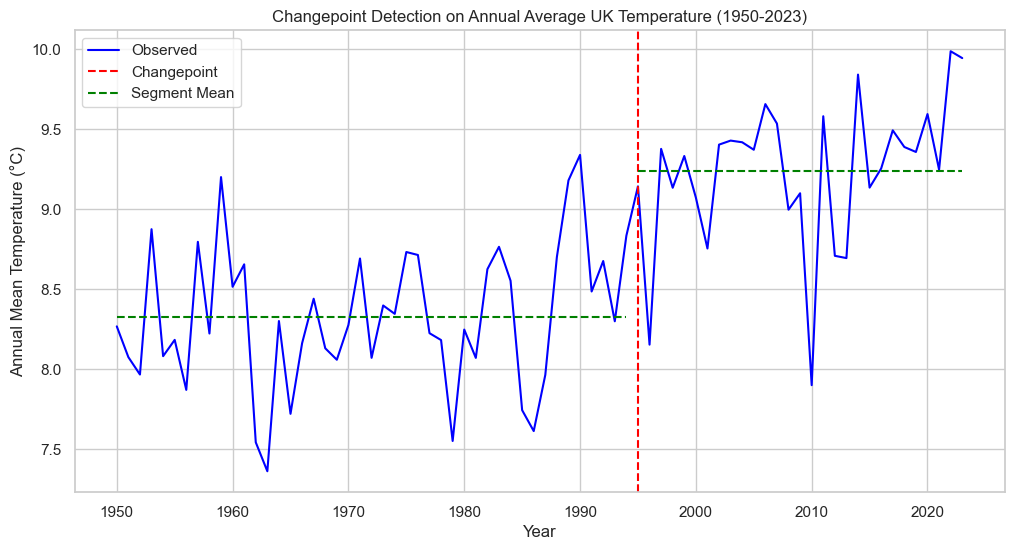

In [123]:

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import ruptures as rpt
from skimage.measure import block_reduce

data_temp = xr.open_mfdataset(r"/Users/maxMax/Desktop/Datasets/12km/tas/mon/v20240514/*.nc", parallel=False)

data_all_months = data_temp.tas.values
annual_mean_temp = block_reduce(data_all_months, block_size=(12, 1, 1), func=np.mean, cval=np.nan)
annual_mean_uk = np.nanmean(annual_mean_temp, axis=(1, 2))#averge over all spatial dims
years = np.arange(1884, 1884 + len(annual_mean_uk))
start_year = 1950
end_year = 2024
range_indices = (years >= start_year) & (years <= end_year)
years_filtered = years[range_indices]
annual_mean_uk_filtered = annual_mean_uk[range_indices]

valid_indices = ~np.isnan(annual_mean_uk_filtered)#removing nans
annual_mean_uk_clean = annual_mean_uk_filtered[valid_indices]
years_clean = years_filtered[valid_indices]

if len(annual_mean_uk_clean) < 10:#check if enough data
    raise ValueError("Not enough valid data.")


print("\nChangepoint Detection on Annual Average UK Temperature (1950-2023):")#detecting changepoints
try:
    changepoints = detect_changepoints(annual_mean_uk_clean, model="rbf", pen=10, algo_type="Binseg")

    change_years = [years_clean[cp] for cp in changepoints[:-1]]#convert changepoint to year
    print(f"Detected Changepoints at Years: {change_years}")

    plt.figure(figsize=(12, 6))
    plt.plot(years_clean, annual_mean_uk_clean, label='Observed', color='blue')
    
    for cp in changepoints[:-1]:
        plt.axvline(x=years_clean[cp], color='red', linestyle='--', label='Changepoint' if cp == changepoints[0] else "")
    previous_cp = 0
    for cp in changepoints:
        mean_value = np.mean(annual_mean_uk_clean[previous_cp:cp])
        plt.hlines(mean_value, xmin=years_clean[previous_cp], xmax=years_clean[cp-1], colors='green', linestyles='--', label='Segment Mean' if previous_cp == 0 else "")
        previous_cp = cp
    
    plt.title('Changepoint Detection on Annual Average UK Temperature (1950-2023)')
    plt.xlabel('Year')
    plt.ylabel('Annual Mean Temperature (°C)')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"An error occurred during changepoint detection: {e}")
